In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns
import scipy.stats as stats

In [3]:
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
df_raw = pd.read_csv('data/bank.csv')
df_raw['JOB'].fillna('Other', inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

df_raw_dummy = pd.get_dummies(df_raw)

df_train, df_test = train_test_split(df_raw_dummy, test_size= 0.2, random_state=1234)
print('학습용 데이터의 크기: {}'.format(df_train.shape))
print('평가용 데이터의 크기: {}'.format(df_test.shape))

df_train_y = df_train['BAD']
df_train_x = df_train.drop(columns = 'BAD', inplace = False)
df_test_y = df_test['BAD']
df_test_x = df_test.drop(columns = 'BAD', inplace = False)

학습용 데이터의 크기: (2998, 19)
평가용 데이터의 크기: (750, 19)


C:\Users\User\AppData\Local\Temp/ipykernel_22576/1690711287.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_raw.fillna(df_raw.mean(), inplace = True)


In [6]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print('학습용 데이터의 정확도 {:.3f}'.format(rf_uncustomized.score(df_train_x, df_train_y)))
print('평가용 데이터의 정확도 {:.3f}'.format(rf_uncustomized.score(df_test_x, df_test_y)))

학습용 데이터의 정확도 1.000
평가용 데이터의 정확도 0.949


In [8]:
rf_uncustomized.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

In [9]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []

# n_estimators 트리 수 변경, 10 ~ 100
para_n_tree = [n_tree * 10 for n_tree in range(1, 20)] # para_n_tree = [10, 20 30, ... 100]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators=v_n_estimators, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

# 모델 설명력 확인
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.993,0.944
1,20,0.997,0.949
2,30,0.999,0.948
3,40,0.999,0.948
4,50,0.999,0.948
5,60,0.999,0.948
6,70,1.000,0.949
7,80,1.000,0.949
8,90,1.000,0.949
9,100,1.000,0.949


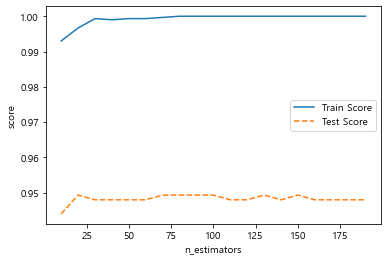

In [10]:
# 모델 설명력 그래프로 확인
plt.plot(para_n_tree, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

- 60?? 150??

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used 

Text(0.5, 0, 'n_estimators')

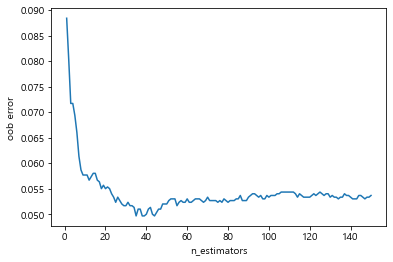

In [11]:
# error 저장 리스트
oob_error = []

for v_n_estimators in range(1, 151):
    rf = RandomForestClassifier(n_estimators=v_n_estimators, oob_score = True, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score_)
    
plt.plot(range(1, 151), oob_error)
plt.ylabel('oob error')
plt.xlabel('n_estimators')

In [13]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []


para_depth = [depth for depth in range(1, 11)] # para_n_tree = [1, 2, 3, 4, ..., 10]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(random_state=1234, n_estimators = 50, max_depth= v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

# 모델 설명력 확인
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.907,0.912
1,2,0.910,0.916
2,3,0.931,0.929
3,4,0.931,0.931
4,5,0.933,0.932
5,6,0.937,0.935
6,7,0.943,0.937
7,8,0.943,0.937
8,9,0.947,0.939
9,10,0.950,0.937


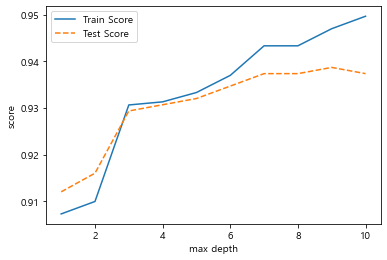

In [14]:
# 모델 설명력 그래프로 확인
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('max depth')
plt.legend()

In [15]:
# depth 7

In [20]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []


para_split = [n_split * 2 for n_split in range(2, 51)] # para_n_tree = [4, 6, 8, ..., 40]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(random_state=1234, n_estimators = 50, max_depth= 7, min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

# 모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.942,0.936
1,6,0.943,0.935
2,8,0.942,0.935
3,10,0.937,0.935
4,12,0.937,0.935
5,14,0.936,0.933
6,16,0.936,0.935
7,18,0.936,0.935
8,20,0.935,0.935
9,22,0.935,0.935


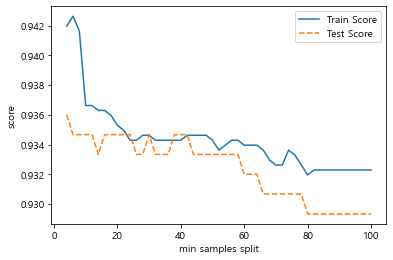

In [21]:
# 모델 설명력 그래프로 확인
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('min samples split')
plt.legend()

In [22]:
# split = 40

In [23]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []

# n_estimators 트리 수 변경, 10 ~ 100
para_leaf = [n_leaf for n_leaf in range(1, 21)] # para_n_tree = [1, 2, 3, 4, ..., 20]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf= v_min_samples_leaf, max_depth= 7, random_state=1234, n_estimators = 50, min_samples_split=40)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.934,0.935
1,2,0.934,0.935
2,3,0.933,0.932
3,4,0.932,0.932
4,5,0.933,0.932
5,6,0.932,0.932
6,7,0.932,0.931
7,8,0.932,0.929
8,9,0.932,0.929
9,10,0.932,0.929


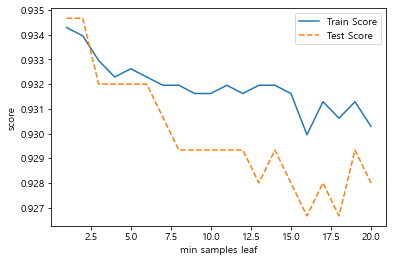

In [24]:
# 모델 설명력 그래프로 확인
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('min samples leaf')
plt.legend()

In [25]:
# leaf = 6

In [34]:
rf_manual = RandomForestClassifier(min_samples_leaf= 6, max_depth= 7, 
                                   random_state=1234, n_estimators = 100, min_samples_split=40)
rf_manual.fit(df_train_x, df_train_y)

RandomForestClassifier(max_depth=7, min_samples_leaf=6, min_samples_split=40,
                       random_state=1234)

In [35]:
print('Train: ', rf_manual.score(df_train_x, df_train_y))
print('Test: ', rf_manual.score(df_test_x, df_test_y))

Train:  0.933288859239493
Test:  0.932


In [36]:
rf_manual_pred = rf_manual.predict(df_test_x)

In [37]:
print('Classification Report \n\n', classification_report(df_test_y, rf_manual_pred))

Classification Report 

               precision    recall  f1-score   support

           0       0.93      1.00      0.96       684
           1       1.00      0.23      0.37        66

    accuracy                           0.93       750
   macro avg       0.97      0.61      0.67       750
weighted avg       0.94      0.93      0.91       750



In [85]:
para_depth = list(range(10, 100))
para_n_tree = list(range(0, 310, 10))
para_leaf = list(range(1, 50)) 
para_split = list(range(2, 100, 2))

print(para_depth)
print(para_n_tree)
print(para_leaf)
print(para_split)

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]


In [89]:
estimator = RandomForestClassifier(random_state = 1234)

# 구하고자 하는 파라미터와 범위
param_grid = {'n_estimators': para_n_tree, 'max_depth': para_depth,
             'min_samples_split': para_split, 'min_samples_leaf': para_leaf}

# 설명력이 높은 최적 파라미터 찾기
random_rf = RandomizedSearchCV(estimator, param_grid, scoring = 'f1', n_jobs= -1)
random_rf.fit(df_train_x, df_train_y)

print('best estimator model: \n{}'.format(random_rf.best_estimator_))
print('\nbest parameter: \n{}'.format(random_rf.best_params_))
print('\nbest score: \n{}'.format(random_rf.best_score_.round(3)))

best estimator model: 
RandomForestClassifier(max_depth=72, min_samples_leaf=6, min_samples_split=4,
                       n_estimators=210, random_state=1234)

best parameter: 
{'n_estimators': 210, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_depth': 72}

best score: 
0.445


In [84]:
estimator = RandomForestClassifier(random_state = 1234)

# 구하고자 하는 파라미터와 범위
param_grid = {'n_estimators': para_n_tree, 'max_depth': para_depth,
             'min_samples_split': para_split, 'min_samples_leaf': para_leaf}

# 설명력이 높은 최적 파라미터 찾기
random_rf = RandomizedSearchCV(estimator, param_grid, scoring = 'f1', n_jobs= -1)
random_rf.fit(df_train_x, df_train_y)

print('best estimator model: \n{}'.format(random_rf.best_estimator_))
print('\nbest parameter: \n{}'.format(random_rf.best_params_))
print('\nbest score: \n{}'.format(random_rf.best_score_.round(3)))

best estimator model: 
RandomForestClassifier(max_depth=240, min_samples_leaf=3, min_samples_split=58,
                       random_state=1234)

best parameter: 
{'n_estimators': 100, 'min_samples_split': 58, 'min_samples_leaf': 3, 'max_depth': 240}

best score: 
0.455


-----------------------------------------------------

In [47]:


estimator = RandomForestClassifier(random_state = 1234)

# 구하고자 하는 파라미터와 범위
param_grid = {'n_estimators': para_n_tree, 'max_depth': para_depth,
             'min_samples_split': para_split, 'min_samples_leaf': para_leaf}

# 설명력이 높은 최적 파라미터 찾기
random_rf = RandomizedSearchCV(estimator, param_grid, scoring = 'f1', n_jobs= -1)
random_rf.fit(df_train_x, df_train_y)

print('best estimator model: \n{}'.format(random_rf.best_estimator_))
print('\nbest parameter: \n{}'.format(random_rf.best_params_))
print('\nbest score: \n{}'.format(random_rf.best_score_.round(3)))

best estimator model: 
RandomForestClassifier(max_depth=130, min_samples_leaf=3, min_samples_split=20,
                       n_estimators=10, random_state=1234)

best parameter: 
{'n_estimators': 10, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_depth': 130}

best score: 
0.51


In [50]:
# 'n_estimators': 10, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_depth': 130
                
rf_final = RandomForestClassifier(n_estimators=10, min_samples_split=20, min_samples_leaf=3, max_depth=130, random_state=1234)
rf_final.fit(df_train_x, df_train_y)


RandomForestClassifier(max_depth=130, min_samples_leaf=3, min_samples_split=20,
                       n_estimators=10, random_state=1234)

In [51]:
print('Train: ', rf_final.score(df_train_x, df_train_y))
print('Test: ', rf_final.score(df_test_x, df_test_y))

Train:  0.9482988659106071
Test:  0.94


In [52]:
rf_final_pred = rf_final.predict(df_test_x)

In [53]:
print('Classification Report \n\n', classification_report(df_test_y, rf_final_pred))

Classification Report 

               precision    recall  f1-score   support

           0       0.94      1.00      0.97       684
           1       0.96      0.33      0.49        66

    accuracy                           0.94       750
   macro avg       0.95      0.67      0.73       750
weighted avg       0.94      0.94      0.93       750



--------------------------------

In [90]:
# best parameter: {'n_estimators': 10, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_depth': 70}

# best score: 
# 0.514

rf_final1 = RandomForestClassifier(n_estimators=10, min_samples_split=20, min_samples_leaf=1, max_depth=70, random_state=1234)
rf_final1.fit(df_train_x, df_train_y)


RandomForestClassifier(max_depth=70, min_samples_split=20, n_estimators=10,
                       random_state=1234)

In [91]:
print('Train: ', rf_final1.score(df_train_x, df_train_y))
print('Test: ', rf_final1.score(df_test_x, df_test_y))

Train:  0.9566377585056705
Test:  0.9453333333333334


In [92]:
rf_final1_pred = rf_final1.predict(df_test_x)

In [95]:
print('Classification Report \n\n', classification_report(df_test_y, rf_final1_pred))
print('\n n_estimators = 10, min_samples_split = 20, min_samples_leaf = 1, max_depth = 70')

Classification Report 

               precision    recall  f1-score   support

           0       0.94      1.00      0.97       684
           1       0.96      0.39      0.56        66

    accuracy                           0.95       750
   macro avg       0.95      0.70      0.76       750
weighted avg       0.95      0.95      0.93       750


 n_estimators = 10, min_samples_split = 20, min_samples_leaf = 1, max_depth = 70


------------------------------------------------------

# 실습하기

In [63]:
df_tel = pd.read_csv('data/tele_customer.csv')
df_tel['CHURN'].replace({'Active': 0, 'Churned': 1}, inplace = True)
df_tel_dummy = pd.get_dummies(df_tel)
df_tel_y = df_tel_dummy['CHURN']
df_tel_x = df_tel_dummy.drop(columns = 'CHURN')

tel_train_x, tel_test_x, tel_train_y, tel_test_y = train_test_split(df_tel_x, df_tel_y, test_size=0.2, random_state=1234)

In [99]:
estimator = RandomForestClassifier(random_state = 1234)

# 구하고자 하는 파라미터와 범위
param_grid = {'n_estimators': para_n_tree, 'max_depth': para_depth,
             'min_samples_split': para_split, 'min_samples_leaf': para_leaf}

# 설명력이 높은 최적 파라미터 찾기
random_rf = RandomizedSearchCV(estimator, param_grid, scoring = 'f1', n_jobs= -1)
random_rf.fit(tel_train_x, tel_train_y)

print('best estimator model: \n{}'.format(random_rf.best_estimator_))
print('\nbest parameter: \n{}'.format(random_rf.best_params_))
print('\nbest score: \n{}'.format(random_rf.best_score_.round(3)))

best estimator model: 
RandomForestClassifier(max_depth=95, min_samples_leaf=34, min_samples_split=50,
                       n_estimators=30, random_state=1234)

best parameter: 
{'n_estimators': 30, 'min_samples_split': 50, 'min_samples_leaf': 34, 'max_depth': 95}

best score: 
0.0


In [97]:
# n_estimators': 60, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 80}
                
tel_final = RandomForestClassifier(n_estimators=60, min_samples_split=6, min_samples_leaf=1, max_depth=80, random_state=1234)
tel_final.fit(tel_train_x, tel_train_y)


RandomForestClassifier(max_depth=80, min_samples_split=6, n_estimators=60,
                       random_state=1234)

In [73]:
print('Train: ', tel_final.score(tel_train_x, tel_train_y))
print('Test: ', tel_final.score(tel_test_x, tel_test_y))

Train:  0.9865591397849462
Test:  0.8655913978494624


In [74]:
tel_final_pred = tel_final.predict(tel_test_x)

In [75]:
print('Classification Report \n\n', classification_report(tel_test_y, tel_final_pred))

Classification Report 

               precision    recall  f1-score   support

           0       0.88      0.97      0.92       153
           1       0.75      0.36      0.49        33

    accuracy                           0.87       186
   macro avg       0.81      0.67      0.71       186
weighted avg       0.85      0.87      0.85       186

